Iteration: 0 Cost: 60.959135091857476
Iteration: 1000 Cost: 0.21259073114912555
Iteration: 2000 Cost: 0.21259061354169279
Iteration: 3000 Cost: 0.21259061354169254
Iteration: 4000 Cost: 0.21259061354169254
Iteration: 5000 Cost: 0.21259061354169254
Iteration: 6000 Cost: 0.21259061354169254
Iteration: 7000 Cost: 0.21259061354169254
Iteration: 8000 Cost: 0.21259061354169254
Iteration: 9000 Cost: 0.21259061354169254
[[10.17453807]
 [-4.29484332]
 [ 1.47689583]]


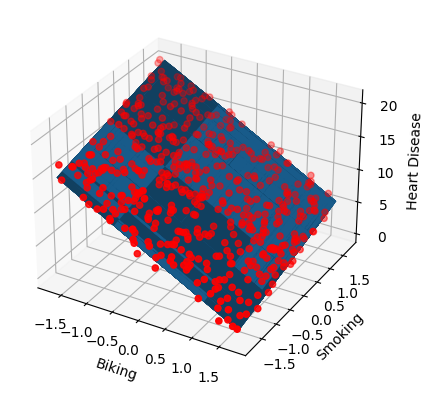

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('heart.data.csv')

# Extract features (biking, smoking) and target (heart disease)
X = data[['biking', 'smoking']].values
y = data['heart.disease'].values.reshape((-1, 1))

# Scale the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y.reshape(-1),c='r')
ax.set_xlabel('Biking')
ax.set_ylabel('Smoking')
ax.set_zlabel('Heart Disease')

# Add intercept term to X
m = y.shape[0]
x0 = np.ones((m, 1))
X = np.concatenate((x0, X), axis=1)

# Define the linear regression class
class Lin_Reg_mul:
    def __init__(self):
        pass

    def cost_func(self, w, X, y):
        # Compute the cost function
        m = y.shape[0]
        J = (1 / (2 * m)) * np.sum((X.dot(w) - y) ** 2)
        return J

    def gradient_descent(self, X, y, w, alpha, iters):
        # Perform gradient descent
        m = y.shape[0]
        cost_history = np.zeros(iters)
        for i in range(iters):
            y_pred = X.dot(w)
            dw = (1 / m) * X.T.dot(y_pred - y)
            w = w - alpha * dw
            cost_history[i] = self.cost_func(w, X, y)
            if i % 1000 == 0:
                print('Iteration:', i, 'Cost:', cost_history[i])
        return w, cost_history

# Initialize parameters
w = np.zeros((X.shape[1], 1))
alpha = 0.01
iters = 10000

# Create an instance of the linear regression model
lr2 = Lin_Reg_mul()

# Perform gradient descent to learn parameters
w, cost_values = lr2.gradient_descent(X, y, w, alpha, iters)

# Print the learned parameters
print(w)

x1=X[:,1]
x2=X[:,2]
X1,X2=np.meshgrid(x1,x2)
y_pred=w[0][0]+w[1][0]*X1+w[2][0]*X2
ax.plot_surface(X1,X2,y_pred)
plt.show()